In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

# initiate


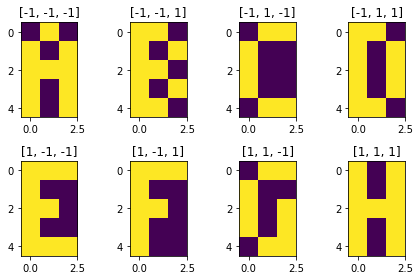

In [3]:
s=[]
s.append((np.array([-1,1,-1,1,-1,1,1,1,1,1,-1,1,1,-1,1]),     [-1,-1,-1]))
s.append((np.array([1,1,-1,1,-1,1,1,1,-1,1,-1,1,1,1,-1]),     [-1,-1,1]))
s.append((np.array([-1,1,1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1]),  [-1,1,-1]))
s.append((np.array([1,1,-1,1,-1,1,1,-1,1,1,-1,1,1,1,-1]),     [-1,1,1]))
s.append((np.array([1,1,1,1,-1,-1,1,1,-1,1,-1,-1,1,1,1]),     [1,-1,-1]))
s.append((np.array([1,1,1,1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1]),   [1,-1,1]))
s.append((np.array([-1,1,1,1,-1,-1,1,-1,1,1,-1,1,-1,1,1]),    [1,1,-1]))
s.append((np.array([1,-1,1,1,-1,1,1,1,1,1,-1,1,1,-1,1]),      [1,1,1]))

for i,v in enumerate(s):
    plt.subplot(241+i)
    plt.tight_layout()
    plt.title(v[1])
    plt.imshow(v[0].reshape(5,3))

# learning


In [8]:
W_3 = np.zeros((15,3))
for v in s[:3]:
    W_3 += np.matmul(v[0][np.newaxis].T,np.array(v[1])[np.newaxis]) 
W_3

array([[ 1., -1.,  3.],
       [-3., -1., -1.],
       [ 1.,  3., -1.],
       [-3., -1., -1.],
       [ 3.,  1.,  1.],
       [-1., -3.,  1.],
       [-3., -1., -1.],
       [-1., -3.,  1.],
       [ 1., -1., -1.],
       [-3., -1., -1.],
       [ 3.,  1.,  1.],
       [-1., -3.,  1.],
       [-1., -3.,  1.],
       [-1.,  1.,  1.],
       [-1.,  1., -3.]])

# Test Network


In [9]:
def BAM(W , X_layer_input = np.array([0] * 15),Y_layer_input = np.array([0] * 3)):
	conv = False
	epochs=30
	X_layer = np.array(X_layer_input.copy())
	Y_layer = np.array(Y_layer_input.copy())
	if X_layer.any():
		while (not conv) and epochs != 0:
			net_y = np.sign(np.matmul(W.T,X_layer))
			for i in range(len(net_y)):
				if net_y[i] != 0:
					Y_layer[i] = int(net_y[i])			
			net_x = np.sign(np.matmul(W,Y_layer))
			for i in range(len(net_x)):
				if net_x[i] != 0:
					X_layer[i] = net_x[i]
			for v in s:
				# 
				if (X_layer == v[0]).all() and np.array(Y_layer == v[1]).all() :
					conv=True
					break
			epochs-=1
	elif Y_layer.any():	
		while (not conv) and epochs != 0:
			net_x = np.sign(np.matmul(W,Y_layer))
			for i in range(len(net_x)):
				if net_x[i] != 0:
					X_layer[i] = net_x[i]
			net_y = np.sign(np.matmul(W.T,X_layer))
			for i in range(len(net_y)):
				if net_y[i] != 0:
					Y_layer[i] = int(net_y[i])	
			for v in s:
				# 
				if (X_layer == v[0]).all() and np.array(Y_layer == v[1]).all() :
					conv=True
					break
			epochs-=1
	return (X_layer,Y_layer,conv)

	Input			output


C:\Users\Alireza\anaconda3\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


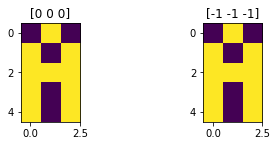

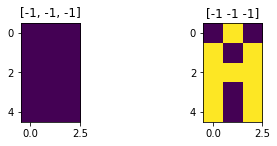

	Input			output


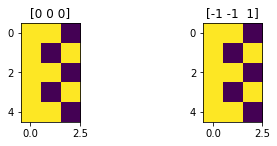

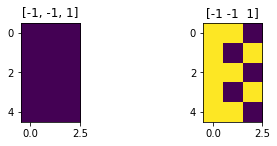

	Input			output


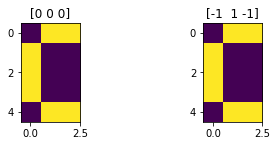

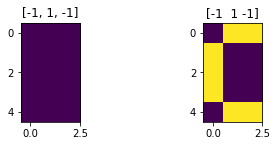

In [10]:
for i,v in enumerate(s[:3]):
	print("\tInput\t\t\toutput")
	plt.tight_layout()
	X_input = v[0]
	Y_input = np.array([0] * 3)
	plt.subplot(221)
	plt.title(Y_input)
	plt.imshow(X_input.reshape(5,3))
	vector = BAM(X_layer_input=X_input,W=W_3)
	plt.subplot(222)
	plt.title(vector[1])
	plt.imshow(vector[0].reshape(5,3))
	plt.show()
	X_input = np.array([0] * 15)
	Y_input = v[1]
	plt.subplot(223)
	plt.title(Y_input)
	plt.imshow(X_input.reshape(5,3))
	vector = BAM(Y_layer_input=Y_input,W=W_3)
	plt.subplot(224)
	plt.title(vector[1])
	plt.imshow(vector[0].reshape(5,3))
	plt.show()

In [11]:
E = [0.1 , 0.4]
results = []
for v in s[:3]:
    for err in E:  
        epochs=100
        acc=0
        for epoch in range(epochs):
            indexes = random.sample(range(len(v[0])),int(len(v[0])*err))
            v_noised=v[0].copy()
            for i in indexes:
                v_noised[i] = v_noised[i] * -1
            indexes = random.sample(range(len(v[1])),int(len(v[1])*err))
            label_noised=v[1].copy()
            for i in indexes:
                label_noised[i] = label_noised[i] * -1
            vector = BAM(X_layer_input=v_noised,Y_layer_input=label_noised,W=W_3)
            if vector[2] and (v[0] == vector[0]).all() and (v[1] == vector[1]).all():
                acc+=1
        results.append({
            "vector":v[1],
            "err":err,
            "acc":acc,
        })
pd.DataFrame(results)

,vector,err,acc
0,"[-1, -1, -1]",0.1,100
1,"[-1, -1, -1]",0.4,39
2,"[-1, -1, 1]",0.1,100
3,"[-1, -1, 1]",0.4,29
4,"[-1, 1, -1]",0.1,100
5,"[-1, 1, -1]",0.4,51


C:\Users\Alireza\anaconda3\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


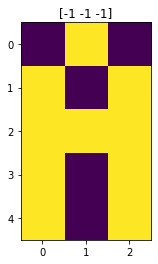

In [12]:
vector = BAM(Y_layer_input=[0,-1,-1],W=W_3)
plt.title(vector[1])
plt.imshow(vector[0].reshape(5,3))
plt.show()

In [14]:
W_8 = np.zeros((15,3))
for v in s:
    W_8 += np.matmul(v[0][np.newaxis].T,np.array(v[1])[np.newaxis]) 

_______________________________________
	Input			output


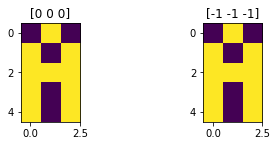

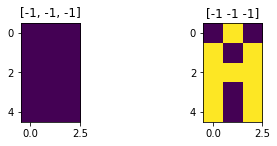

_______________________________________
	Input			output


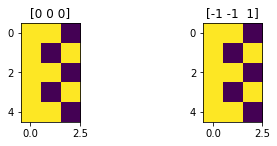

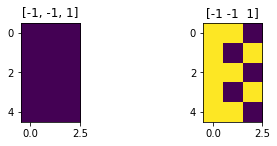

_______________________________________
	Input			output


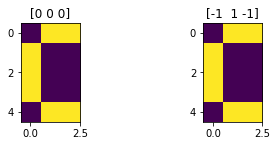

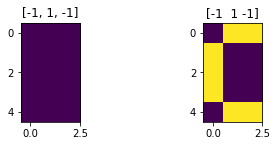

_______________________________________
	Input			output


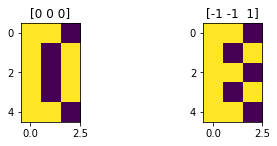

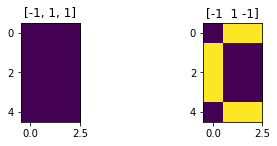

_______________________________________
	Input			output


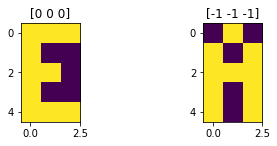

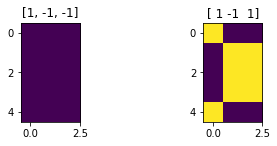

Not Converged
_______________________________________
	Input			output


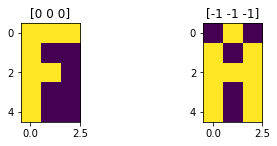

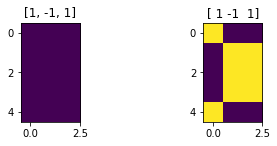

Not Converged
_______________________________________
	Input			output


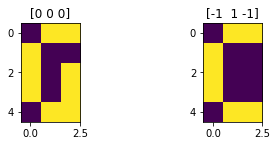

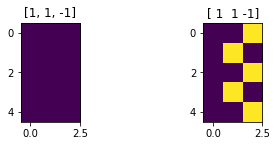

Not Converged
_______________________________________
	Input			output


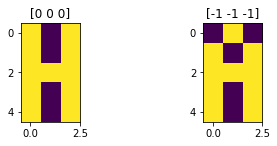

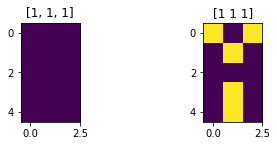

Not Converged


In [15]:
for i,v in enumerate(s):
	print("_______________________________________")
	print("\tInput\t\t\toutput")
	plt.tight_layout()
	X_input = v[0]
	Y_input = np.array([0] * 3)
	plt.subplot(221)
	plt.title(Y_input)
	plt.imshow(X_input.reshape(5,3))
	vector = BAM(X_layer_input=X_input,W=W_3)
	plt.subplot(222)
	plt.title(vector[1])
	plt.imshow(vector[0].reshape(5,3))
	plt.show()
	if not vector[2]:
		print("Not Converged")
	X_input = np.array([0] * 15)
	Y_input = v[1]
	plt.subplot(223)
	plt.title(Y_input)
	plt.imshow(X_input.reshape(5,3))
	vector = BAM(Y_layer_input=Y_input,W=W_3)
	plt.subplot(224)
	plt.title(vector[1])
	plt.imshow(vector[0].reshape(5,3))
	plt.show()
	if not vector[2]:
		print("Not Converged")

# Haming

In [16]:
haming = np.zeros(64).reshape(8,8)
for i in range(len(s)):
    for j in range(i,len(s)):
        haming[i][j] = haming[j][i] = np.array((s[i][0] != s[j][0])).sum()

In [28]:
pd.DataFrame(np.array(pd.DataFrame(haming,index=["A","B","C","D","E","F","G","H"],columns=["A","B","C","D","E","F","G","H"]).sum())[np.newaxis],columns=["A","B","C","D","E","F","G","H"])

,A,B,C,D,E,F,G,H
0,35.0,33.0,39.0,35.0,31.0,35.0,37.0,37.0
